In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [80]:
df.shape

(1470, 35)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*   The dataset contains 1470 observations and 35 variables.

*   There are no missing values.

*   Variables type:

>    **Numeric variables:**
*   Related to personal information: age, distance_from_home, employee_number
(id variable)
*   Related to income: hourly_rate, daily_rate, monthly_rate, monthly_income,percent_salary_hike 
*   Related to time in company: years_at_company, years_in_current_role, years_since_last_promotion, years_with_curr_manager, total_working_years
*   Other: num_companies_worked, standard_hours(to delete), training_times_last_year, employee_count (to delete)

>   **Categorical variables:**
*   Binary variables: attrition(target variable), gender, over18 (to delete), over_time
*   Nominal variables: department, education_field, job_role, marital_status
>   Ordinal variables:
    *    Ordinal regarding satisfaction and performance : environment_satisfaction, job_satisfaction, relationship_satisfaction, work_life_balance,job_involvement,performance_rating
    *    Other ordinal: business_travel, education, job_level, stock_option_level

In [82]:
# To set the output column on front
front=df['Attrition']
df.drop(labels=['Attrition'],axis=1,inplace=True)
df.insert(0,'Attrition',front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [83]:
df.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours','Over18'],axis=1,inplace=True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


In [84]:
# Ecoding Label Column using List comprehension
Attrition={'Yes':1,'No':0}
df.Attrition=[Attrition[item] for item in df.Attrition]

In [85]:
#Get categorical values of column 
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

**Encoding Catagorical Features**

In [86]:
df.Gender.replace(['Male','Female'],[1,0],inplace=True)
df.OverTime.replace(['Yes','No'],[1,0],inplace=True)
Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
df.EducationField=[Field[item] for item in df.EducationField]

Encoding catagorical columns like Gender, Overtime, & EducationalField

**Gender** Male = 1, Female = 0

**Overtime** Yes = 1, No = 0

**EducationField**

Other:0

Medical:1

Life Sciences:2

Marketing:3

Technical Degree:4

Human Resources:5


# **Exploring the Data**

**Summarizing based on Attrition**

In [87]:
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.871046,2.771290,0.593674,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.147679,2.464135,0.632911,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


The first thing to do is to see what is the attrition rate.

In [88]:
Attrition_Rate=df.Attrition.value_counts()
print(Attrition_Rate)

0    1233
1     237
Name: Attrition, dtype: int64


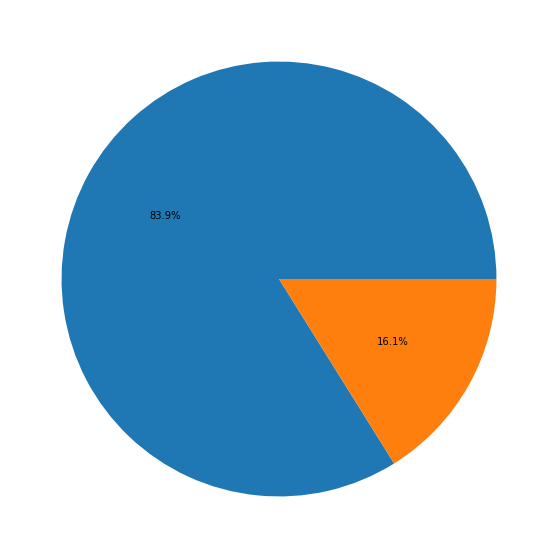

In [89]:
Attrition_Rate=df.Attrition.value_counts()/len(df)
Attrition_Rate
plt.figure(figsize=(10,10))
c=round((Attrition_Rate*100), 2)
plt.pie(Attrition_Rate, autopct='%1.1f%%' )
plt.show()

Looks like about 84% of employees stayed and 16% of employees left

That is 237 out of 1470 employees churned

**Correlation between parameters**

,Attrition,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.159205,-0.056652,0.077924,-0.031373,0.094277,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.010661,-0.001686,0.208034,0.017366,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,-0.056652,0.010661,1.000000,-0.004985,-0.016806,-0.031376,0.018355,-0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.077924,-0.001686,-0.004985,1.000000,0.021042,0.000068,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.016806,0.021042,1.000000,0.031530,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.094277,0.017366,-0.031376,0.000068,0.031530,1.000000,-0.006058,0.001802,0.021421,-0.009296,0.014773,-0.016959,0.008724,0.013729,-0.006323,-0.015268,-0.057384,-0.034845,0.003102,-0.010969,-0.044946,0.001242,0.004016,0.021484,0.002208,0.008355
EnvironmentSatisfaction,-0.103369,0.010146,0.018355,-0.016075,-0.027128,-0.006058,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.029453,-0.036311,-0.011716,-0.001851,-0.016547,0.001802,0.000508,1.000000,-0.000478,0.017960,-0.039403,0.033252,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,-0.006846,0.024287,0.023381,0.031131,0.016775,0.021421,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.007782,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,-0.130016,0.029820,0.046135,0.008783,0.042438,-0.009296,-0.008278,0.017960,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.003507,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


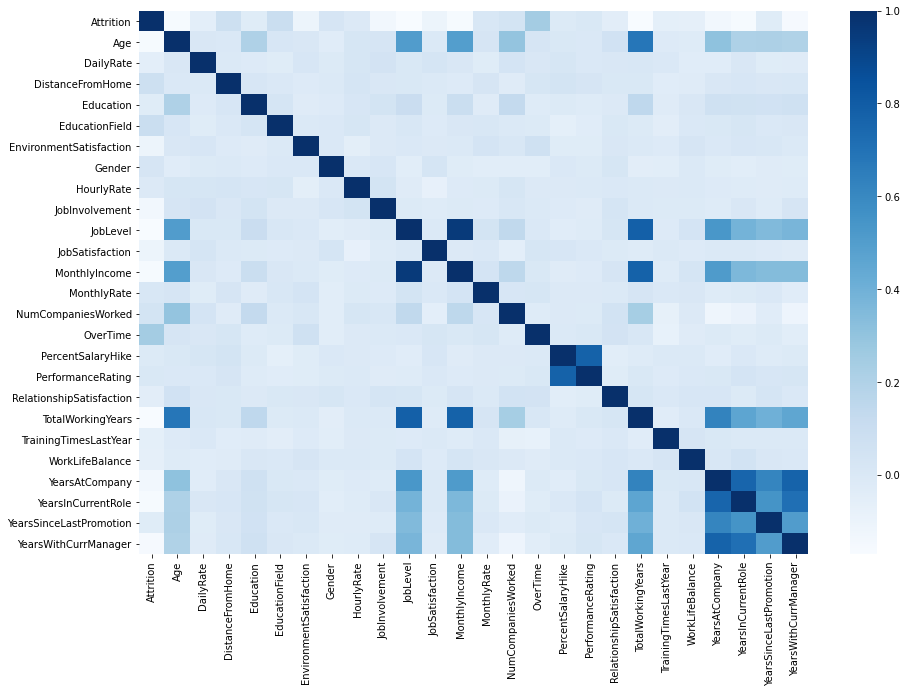

In [90]:
corr=df.corr()
corr=(corr)
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,cmap='Blues')
corr

**Observations:-**

Joblevel is highly corelated with MonthlyIncome (95%)

JobLevel is correlated with TotalExperience (78%)

Percentage of SalaryHike is related to PerformanceRating (77%)

MonthlyIncome is correlated with TotalExperience (77%)

YearsAtCompany is correlated with YearswithCurrentManager (77%)

YearsAtCompany is correlated with YearCurrentRole (76%)

Attrition rate is comparatevely highly correlated with OverTime (25%)

>  **Exploring Catagorical Features**

Index(['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus'], dtype='object')


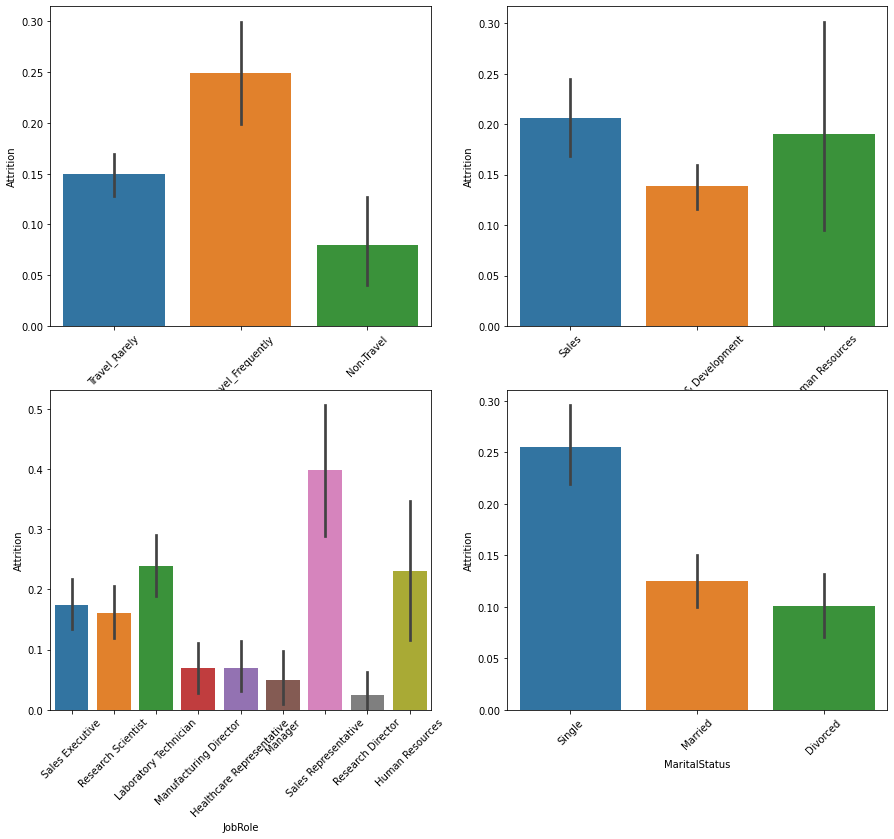

In [91]:
# Relation of target variable with Categorical features
# Object datatypes
obj_fea = df.select_dtypes(include=['object'])
print(obj_fea.columns)
plt.figure(figsize=(15,20))
for i,feat in enumerate(obj_fea.columns):
    plt.subplot(3,2,i+1)
    sns.barplot(x=df[feat],y=df['Attrition'])
    plt.xticks(rotation=45)
plt.show()

**Exploring numerical features**



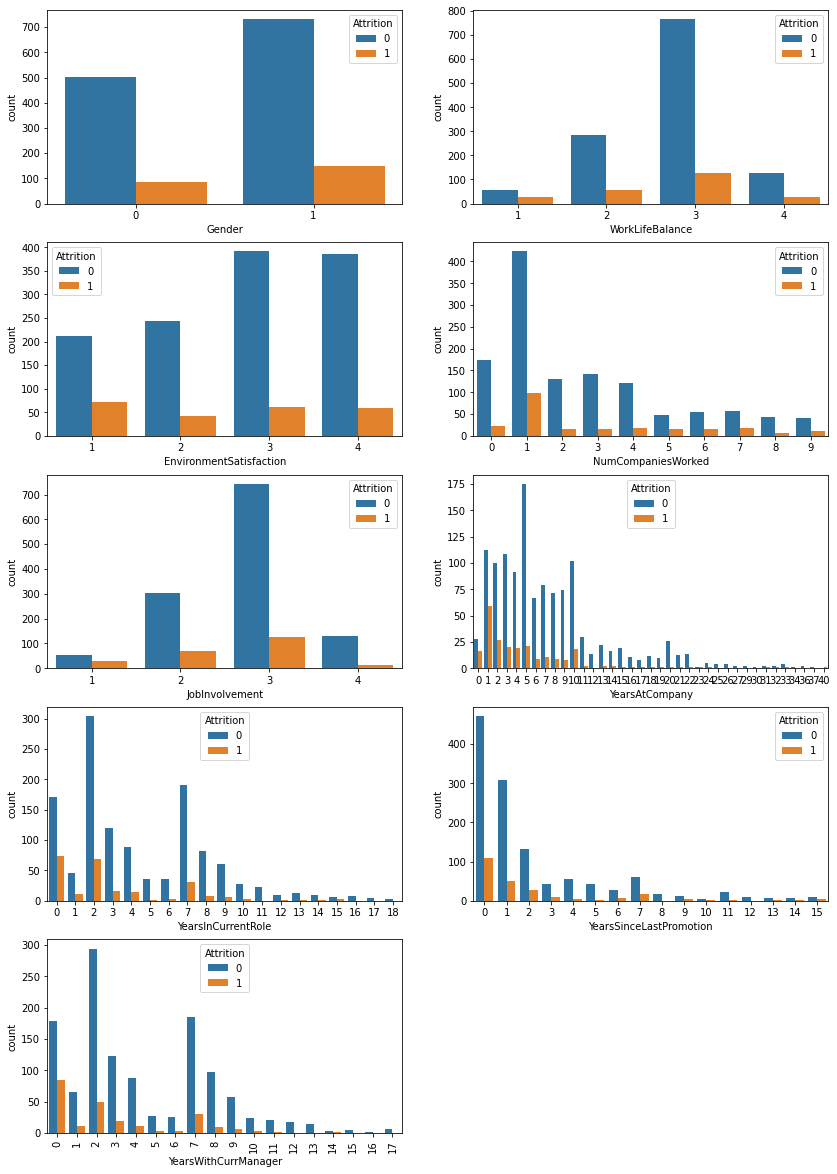

In [92]:
total_records= len(df)
columns = ['Gender','WorkLifeBalance','EnvironmentSatisfaction','NumCompaniesWorked',
           'JobInvolvement','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(14,4))
j=0
for i in columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()

**Observations:-**

1  Men tends to leave company sooner than women

2  Who have least worklife balance tends to resign faster than other

3  Who leastly likes the environment in company tends to leave company sooner than others

4  Who worked for more number of compannies tends to switch again!

5  Who leastly involves in Job in company tends to leave company sooner than others

6  Seniors in company tends to leave sooner than others, Employee leaving the company at initial stage

7  Who stays in current role for longer time and who just got new role tends to leave company sooner than others

8  Who don't get promotion for long time tends to leave comapany

9  Who stays with Manager for longer time and shorter time tends to leave company than others  

**Age Vs Attrition**

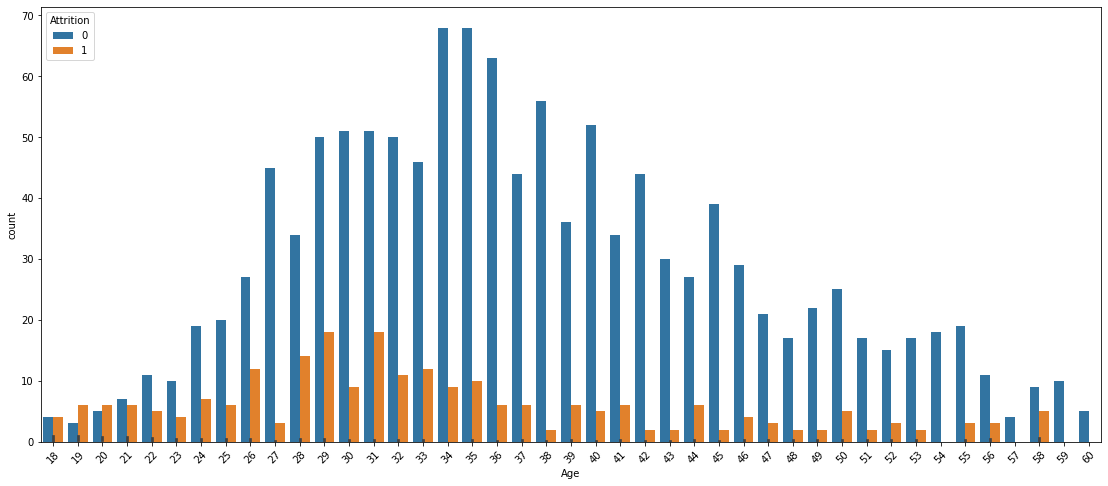

In [93]:
plt.figure(figsize=(19,8))
sns.barplot(x=df['Age'],y=df['Attrition'])
sns.countplot(x='Age',hue='Attrition',data=df)
plt.xticks(rotation=45)
plt.show()

**Observations:-**

Age is distributed quite normally and Employee who churn are younger.

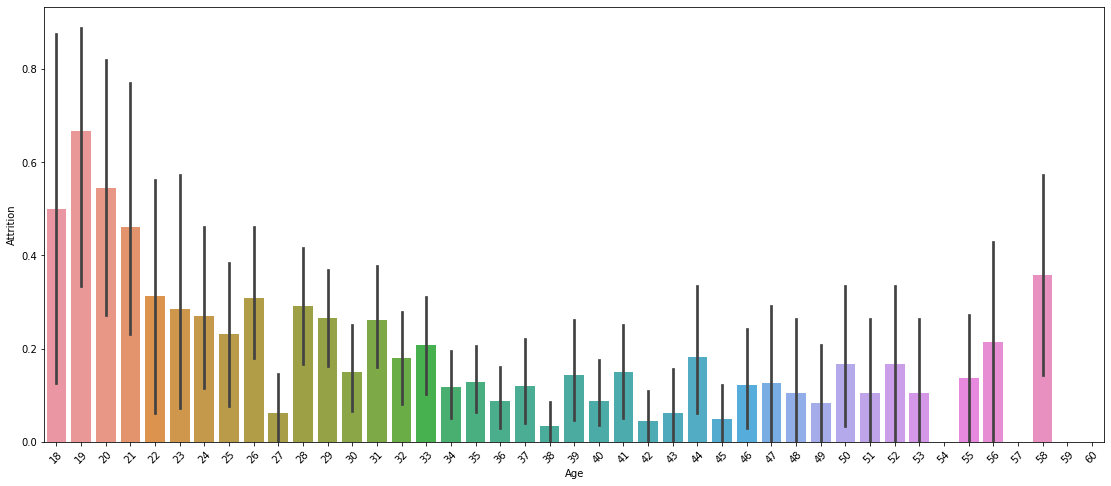

In [94]:
plt.figure(figsize=(19,8))
sns.barplot(x=df['Age'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

**Observations:-**

*  Teenagers highly tends to leave company than Mid aged

*  Persons whose age more than 55 tends to leave company than Mid aged

# **Data preprocessing**

The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

Replaceing Catagorical columns in a data frame

In [95]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,41,1102,1,2,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1
1,0,49,279,8,1,2,3,1,61,2,2,2,5130,24907,1,0,23,4,4,10,3,3,10,7,1,7,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,1,37,1373,2,2,0,4,1,92,2,1,3,2090,2396,6,1,15,3,2,7,3,3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0,33,1392,3,4,2,4,0,56,3,1,3,2909,23159,1,1,11,3,3,8,3,3,8,7,3,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,27,591,2,1,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,6,3,3,2,2,2,2,0,1,1,0,0,1,0,0,0,0,0,0,1,0


**Splitting Dataset**

In [96]:
# Defining X and y
X= df.iloc[:,1:]
y=df.iloc[:,0]

In [97]:
# Defining Training and Testing dataset 
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=1/3,random_state=1)

# >  **Modeling the Data**

**1. Logistic regression**

In [98]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg_model = lreg.fit(Xtrain,ytrain)
lreg_predict = lreg_model.predict(Xtest)

from sklearn.metrics import accuracy_score

lreg_acc= accuracy_score(ytest, lreg_predict)
print('Accuracy with LogisticRegression : ' + str(round(lreg_acc,4)*100))

Accuracy with LogisticRegression : 83.06


**2. Decision Tree Classification**

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtclass = DecisionTreeClassifier()
dtclass_model = dtclass.fit(Xtrain,ytrain)
dtclass_predict = dtclass_model.predict(Xtest)
dtclass_acc=accuracy_score(ytest,dtclass_predict)

print('Accuracy with DecisionTreeClassifier : ' + str(round(dtclass_acc,4)*100))

Accuracy with DecisionTreeClassifier : 76.33


**3.  Random Forest Classification**

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier()
rfclass_model = rfclass.fit(Xtrain,ytrain)
rfclass_predict = rfclass_model.predict(Xtest)
rfclass_acc=accuracy_score(ytest,rfclass_predict)
print('Accuracy with Random Forest Classifier : '  + str(round(rfclass_acc,4)*100))

Accuracy with Random Forest Classifier : 83.67


**Ensemble Learning**

**1. Ada Boost Classifier**

In [101]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ada = AdaBoostClassifier()
ada_model = ada.fit(Xtrain,ytrain)
ada_predict = ada_model.predict(Xtest)
ada_acc= accuracy_score(ytest,ada_predict)
print('Accuracy Score with AdaBoostClassifier : ' + str(round(ada_acc,3)*100))

Accuracy Score with AdaBoostClassifier : 85.5


**2. Gradient Boosting Classifier**

In [102]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(Xtrain,ytrain)
gb_predict = gb_model.predict(Xtest)
gb_acc= accuracy_score(ytest,gb_predict)
print('Accuracy Score with GradientBoostingClassifier : ' + str(round(gb_acc,4)*100))

Accuracy Score with GradientBoostingClassifier : 83.27


Ada Boost Classifier performed well on this problem